In [8]:
#Importing the libraries:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#reading the dataset:

df=pd.read_csv('economic_index.csv')

In [3]:
df.head(5)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
#dropping the unnecessary columns:

df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [6]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
#To check the null values:

df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

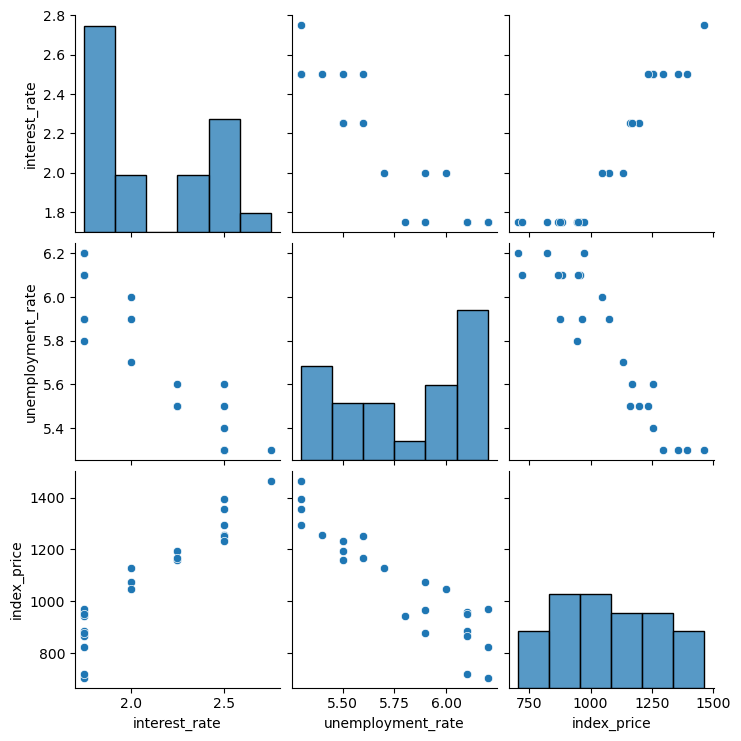

In [9]:
#Data visualization:

sns.pairplot(df)

In [10]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

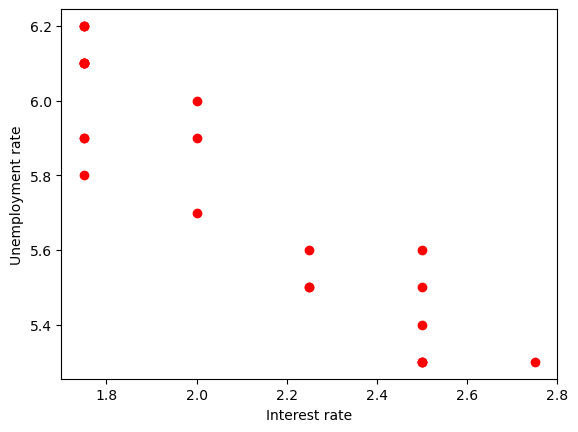

In [14]:
#Negative correlation:

plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('Interest rate')
plt.ylabel('Unemployment rate')

Text(0, 0.5, 'index_price')

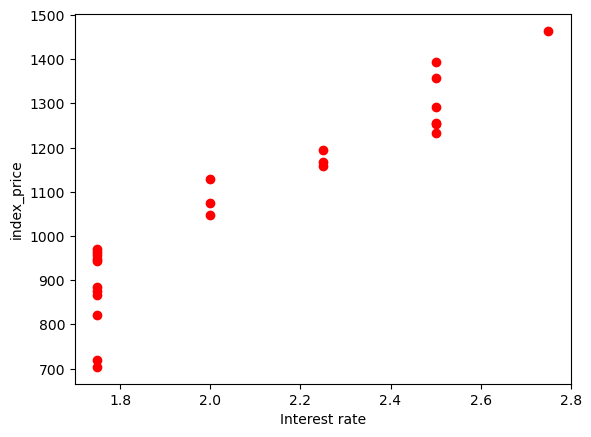

In [13]:
#Positive correlation:

plt.scatter(df['interest_rate'],df['index_price'],color='r')
plt.xlabel('Interest rate')
plt.ylabel('index_price')

In [16]:
#splitting the data into dependent and independent features:

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [18]:
X.head()


,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [19]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [24]:
#splitting the data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

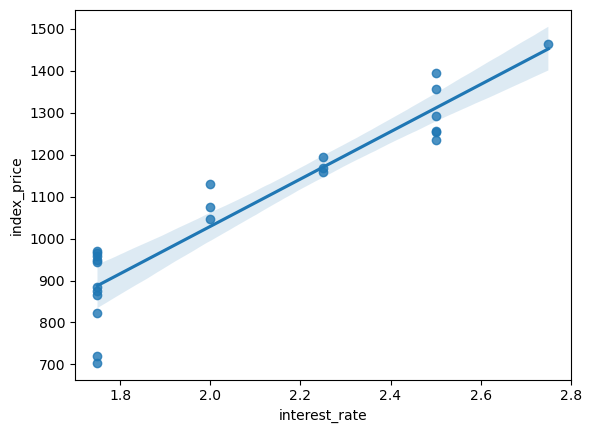

In [27]:
sns.regplot(x='interest_rate',y='index_price',data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

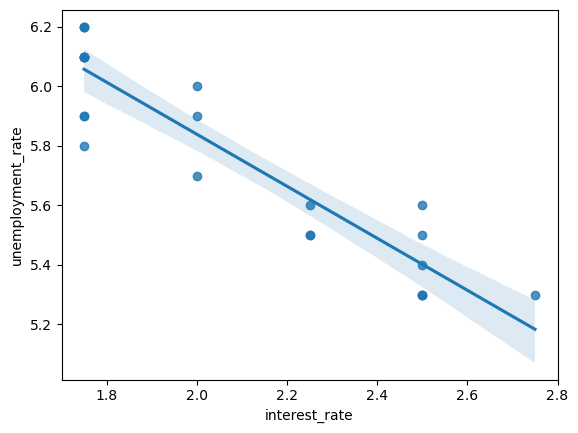

In [28]:
sns.regplot(x='interest_rate',y='unemployment_rate',data=df)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

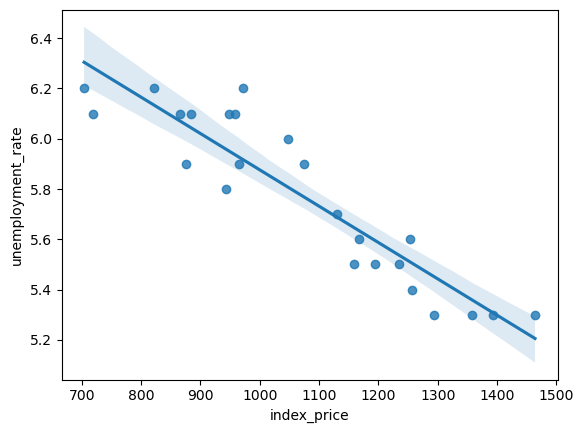

In [31]:
sns.regplot(x='index_price',y='unemployment_rate',data=df)

In [32]:
#Preprocessiong- Standardization

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [33]:
#Multiple linear regression

from sklearn.linear_model import LinearRegression

regression=LinearRegression()

regression.fit(X_train,y_train)

LinearRegression()

In [38]:
from sklearn.model_selection import cross_val_score

validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',\
                                 cv=3)



In [39]:
np.mean(validation_score)

-5914.828180162388

In [40]:
#Prediction

y_pred=regression.predict(X_test)

In [46]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [42]:
#Performance metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

5793.762887712579
59.935781523235526
76.11677139574812


In [45]:
from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred)
print(score)

#adjusted r^2

print(1-(1-score)*(len(y_test)-1)/len(y_test)-X_test.shape[-1]-1)

0.8278978091457142
-2.1434184923785713


Assumptions to judge the model performance

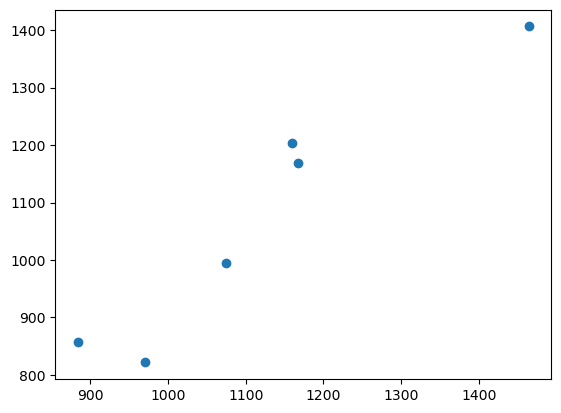

In [47]:
#linear relationship

plt.scatter(y_test,y_pred)

In [48]:
#errors and normal distribution

residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


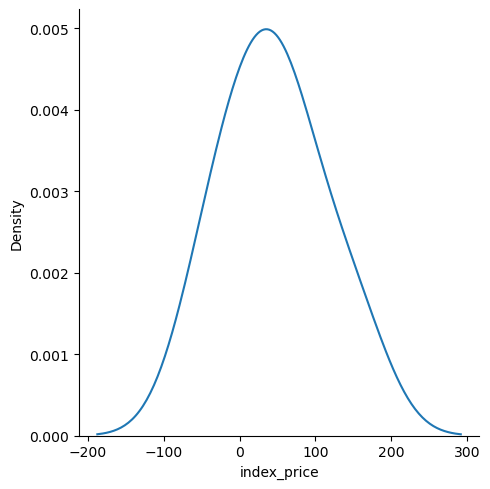

In [49]:
sns.displot(residuals,kind='kde')

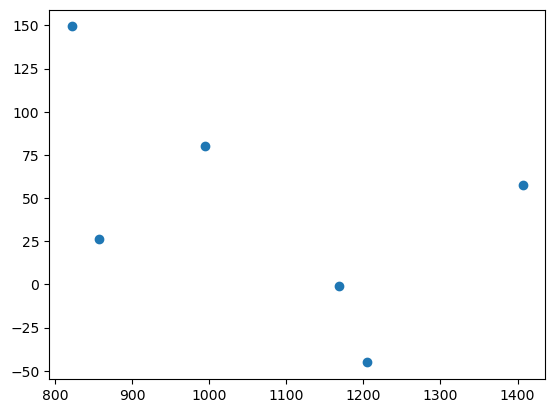

In [50]:
#scatter plot between the residuals and the prediction - uniforam distribution(good result) or have patters(bad result)

plt.scatter(y_pred,residuals)

In [51]:
#OLS linear regression

import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [52]:
model.summary()

c:\Users\prath\anaconda-new\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 28 Jul 2024   Prob (F-statistic):                       0.754
Time:                        22:38:46   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
print(regression.coef_)

[  88.27275507 -116.25716066]
